In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    dataset = pd.read_csv('50_Startups.csv')
    return dataset

In [3]:
dataset = load_data()
print(dataset.head())
print(dataset.isnull().sum())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


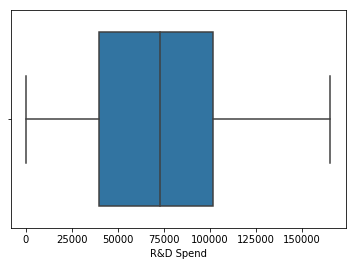

In [4]:
import seaborn as sn
sn.boxplot(dataset['R&D Spend'])

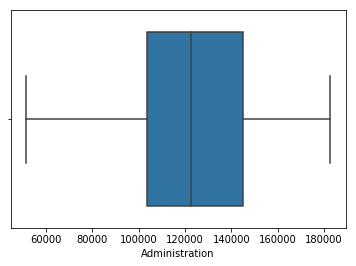

In [5]:
sn.boxplot(dataset['Administration'])

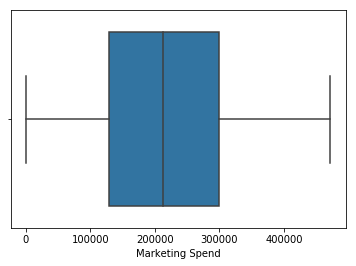

In [6]:
sn.boxplot(dataset['Marketing Spend'])

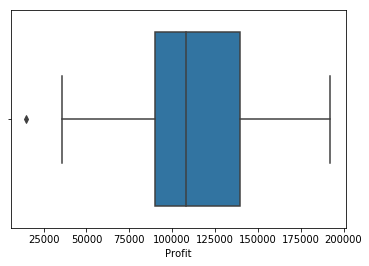

In [7]:
sn.boxplot(dataset['Profit'])

In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset['Profit']))
print(z)

[2.01120333 1.99942997 1.98084225 1.77662724 1.35774012 1.12724963
 1.10548055 1.09620987 1.00746967 0.94602247 0.85484675 0.80816756
 0.74115484 0.55874952 0.51602637 0.44871967 0.3754357  0.33477114
 0.307116   0.26977265 0.16193522 0.01753384 0.04161264 0.08216943
 0.08672946 0.11549309 0.15736664 0.17554233 0.21879755 0.27588222
 0.3026246  0.36412744 0.36552389 0.38178711 0.38344421 0.38929092
 0.53393161 0.5529549  0.77149734 0.77709368 0.84641135 0.85746568
 1.01536466 1.05896021 1.17320899 1.18008224 1.56692212 1.74062718
 1.91321197 2.43931323]


In [9]:
threashhold = 3
print(np.where(z>threashhold))

(array([], dtype=int32),)


In [10]:
State_label = dataset['State'].values
print(np.unique(State_label))

['California' 'Florida' 'New York']


In [11]:
unique_label = np.unique(State_label)
unique_label

array(['California', 'Florida', 'New York'], dtype=object)

In [12]:
California = np.array([])
New_York = np.array([])
a = 0
b = 1
Florida = np.array([])
for i in dataset['State']:
    if(i in unique_label[0]):
        California = np.append(California, b)
        New_York = np.append(New_York, a)
        Florida = np.append(Florida, a)
    elif(i in unique_label[1]):
        California = np.append(California, a)
        New_York = np.append(New_York, a)
        Florida = np.append(Florida, b)
    else:
        California = np.append(California, a)
        New_York = np.append(New_York, b)
        Florida = np.append(Florida, a)
print(California)
print(len(California))
print(Florida)
print(dataset['State'])

[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1.]
50
[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0.]
0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    Cal

In [13]:
dataset['California'] = California
dataset['New_York'] = New_York
dataset = dataset.drop(columns = 'State')
print(dataset.head())

   R&D Spend  Administration  Marketing Spend     Profit  California  New_York
0  165349.20       136897.80        471784.10  192261.83         0.0       1.0
1  162597.70       151377.59        443898.53  191792.06         1.0       0.0
2  153441.51       101145.55        407934.54  191050.39         0.0       0.0
3  144372.41       118671.85        383199.62  182901.99         0.0       1.0
4  142107.34        91391.77        366168.42  166187.94         0.0       0.0


In [14]:
dataset = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'New_York', 'Profit']]
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,5].values
#print(X)
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [15]:
v = np.ones((50,1))
v.shape
X = np.c_[v, X]
X.shape

(50, 6)

In [16]:
#Converting X to X transpose matrix
XT = X.T
XT.shape

(6, 50)

In [17]:
#X transpose * X
XtX = XT.dot(X)
print(XtX.shape)
print(XtX)

(6, 6)
[[5.00000000e+01 3.68608078e+06 6.06723198e+06 1.05512549e+07
  1.70000000e+01 1.70000000e+01]
 [3.68608078e+06 3.74987671e+11 4.62533664e+11 9.77064829e+11
  1.09918046e+06 1.29531606e+06]
 [6.06723198e+06 4.62533664e+11 7.74690944e+11 1.27493994e+12
  2.05269062e+06 2.06623900e+06]
 [1.05512549e+07 9.77064829e+11 1.27493994e+12 2.95937068e+12
  3.10319580e+06 3.49088227e+06]
 [1.70000000e+01 1.09918046e+06 2.05269062e+06 3.10319580e+06
  1.70000000e+01 0.00000000e+00]
 [1.70000000e+01 1.29531606e+06 2.06623900e+06 3.49088227e+06
  0.00000000e+00 1.70000000e+01]]


In [18]:
#Finding inverse of X transpose X 
invXtX = np.linalg.inv(XtX)
invXtX

array([[ 5.90223649e-01,  9.89481677e-07, -3.65603691e-06,
        -6.56658047e-07, -9.28805760e-02, -8.64077386e-02],
       [ 9.89481677e-07,  2.41710393e-11, -1.05227523e-11,
        -6.70911078e-12, -5.70519609e-08, -1.74534524e-07],
       [-3.65603691e-06, -1.05227523e-11,  3.06192680e-11,
         3.14163864e-12,  6.57662968e-08,  9.11235942e-08],
       [-6.56658047e-07, -6.70911078e-12,  3.14163864e-12,
         3.29807063e-12,  1.09078775e-07,  1.08767833e-07],
       [-9.28805760e-02, -5.70519609e-08,  6.57662968e-08,
         1.09078775e-07,  1.27540561e-01,  6.68352979e-02],
       [-8.64077386e-02, -1.74534524e-07,  9.11235942e-08,
         1.08767833e-07,  6.68352979e-02,  1.25119418e-01]])

In [19]:
Y = Y.reshape(50,1)
XtY = XT.dot(Y)
XtY.shape

(6, 1)

In [20]:
Theta = invXtX.dot(XtY)
print(Theta.size)
print(Theta)

6
[[ 5.03241326e+04]
 [ 8.06023114e-01]
 [-2.70043196e-02]
 [ 2.69798610e-02]
 [-1.98788793e+02]
 [-2.40675812e+02]]


In [21]:
theta0 = Theta[0]
theta1 = Theta[1]
theta2 = Theta[2]
theta3 = Theta[3]
theta4 = Theta[4]
theta5 = Theta[5]
print(theta0)

[50324.13262453]


In [22]:
X.shape
print(Theta.shape)

(6, 1)


In [23]:
#for i in range(len(X)):
y_hat = np.array([])
y_hat1 = 0
for i  in range(X.shape[0]):
    for j in range(X.shape[1]):
        #print(X[i][j])
        y_hat1 = y_hat1 + (Theta[j] * X[i][j])
    y_hat=np.append(y_hat,y_hat1, axis=0)
    y_hat1 = 0
y_hat = y_hat.reshape(50,1)
y_hat.shape

(50, 1)

In [24]:
#R squared
numer = 0.0
denom = 0.0
y_mean1 = 0
for i in range(len(Y)):
    y_mean1 = y_mean1 + Y[i]
y_mean1 = y_mean1/len(Y)
y_mean = np.mean(Y)
#print(y_mean1)
#print(y_mean)
for i in range(len(Y)):
    numer = numer + ((y_hat[i] - y_mean1)**2 )
    denom = denom + ((Y[i] - y_mean1)**2)
Rsquared = numer / denom
print("RSquared =",Rsquared)

RSquared = [0.95075248]


In [25]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,California,New_York,Profit
0,165349.20,136897.80,471784.10,0.0,1.0,192261.83
1,162597.70,151377.59,443898.53,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,166187.94


In [26]:
#dataset.to_csv('/home/hduser/datasets/startup.csv')